In [6]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd

data = pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [87]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=len(data.columns)//1)
for i, var in enumerate(data.columns):
    fig.add_trace(go.Box(y=data[var], name=var),row=i%1+1, col=i//1+1)

fig.update_traces(boxpoints='all', jitter=.3)
fig.update_layout(height=500, showlegend=False)
fig.show()

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

data = pd.read_csv('WineQT.csv')
data

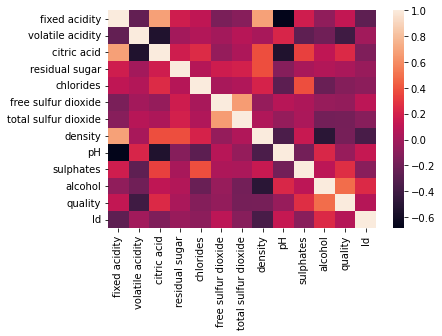

In [51]:
sns.heatmap(data.corr())
plt.show()

In [56]:
correlations = data.corr()
print(correlations)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

In [65]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs
    #[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [67]:
features = get_features(0.05) 
print(features) 
x = data[features] 
y = data['quality']

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.250728     0.673157   
volatile acidity           0.250728          1.000000     0.544187   
citric acid                0.673157          0.544187     1.000000   
residual sugar             0.171831          0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide        0.164831          0.001962     0.057589   
total sulfur dioxide       0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                         0.685163          0.221492     0.546339   
sulphates                  0.174592          0.276079     0.331232   
alcohol                    0.075055          0.203909     0.106250   
quality                    0.121970          0.407394     0.240821   
Id                         0.275826          0.007892     0.139011   

                   

In [95]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.5, random_state=20)

#print(data[features])
print(data['quality'])

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


In [100]:
X_train, y_test = train_test_split(data, test_size=0.5, random_state=20)


In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# read the dataset
df = pd.read_csv('wineQT.csv')
 
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
243            11.9              0.57         0.50            2.60      0.082   
1012            7.8              0.53         0.01            1.60      0.077   
35              6.6              0.52         0.04            2.20      0.069   
986             6.0              0.49         0.00            2.30      0.068   
597             6.7              0.28         0.28            2.40      0.012   
...             ...               ...          ...             ...        ...   
1033            6.6              0.58         0.02            2.00      0.062   
763             8.7              0.42         0.45            2.40      0.072   
835             9.8              0.39         0.43            1.65      0.068   
559             7.1              0.52         0.03            2.60      0.076   
684             8.8              0.33         0.41            5.90      0.073   

      free sulfur dioxide  

In [110]:
print(X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
946             9.1             0.775         0.22             2.2      0.079   
142             6.9             1.090         0.06             2.1      0.061   
934             9.1             0.760         0.68             1.7      0.414   
625             9.0             0.800         0.12             2.4      0.083   
124             7.3             0.380         0.21             2.0      0.080   
...             ...               ...          ...             ...        ...   
913            11.3             0.370         0.50             1.8      0.090   
21              7.8             0.645         0.00             2.0      0.082   
810             7.3             0.320         0.23             2.3      0.066   
1115            7.2             0.695         0.13             2.0      0.076   
250             6.7             0.750         0.01             2.4      0.078   

      free sulfur dioxide  

In [111]:
print(y_train)

243      344
1012    1420
35        51
986     1390
597      836
        ... 
1033    1452
763     1083
835     1181
559      779
684      974
Name: Id, Length: 571, dtype: int64


In [112]:
print(y_test)

946     1333
142      199
934     1319
625      886
124      176
        ... 
913     1285
21        29
810     1144
1115    1562
250      355
Name: Id, Length: 572, dtype: int64


In [113]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [115]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.coef_) 


[-1.06968796e+02  3.07017371e+01  1.43570803e+02 -2.10186861e+01
 -4.29073612e+02  1.25482970e+01 -4.90110317e+00 -1.32123427e+04
 -7.65474138e+02 -2.17699372e+02  8.85602689e+01  2.13070733e+00]


In [116]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[ 501.07940978  948.50621832  892.09266263 1128.4240248  1294.26313701
  879.44388723  790.84708931  465.74178444  152.39110874  993.90892347
  956.63364481  918.98263242  979.30161693  808.75416098  850.58903656
  753.06583104  942.6294739   670.67227486  534.93030868 1058.39895349
  838.57331284  952.79193322  626.87161779  997.8330674   461.95511194
  739.9742376  1117.73357109  862.4204945   455.77847661 1269.44061875
  658.34743402  593.69191456  909.57620969  953.20706034  965.36271816
 1063.87701477  636.68976196  650.25305807  707.49211262  822.24156201
  922.16530482  882.80348109  507.08611716  721.37665663  772.87014236
  838.54725992  551.39854661  602.05023456  657.8642286   701.79254685
  777.32288988  465.74178444  812.84257586  592.61732727 1027.75625765
  361.22750637 1065.83919081 1041.26458889  927.10680881  880.82839347
  668.94449376  742.54488943  482.59965678  694.97332609  309.65893401
  941.60106051  571.07921705 1005.74829691 1137.53844922  676.51872038
  572.